In [50]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# loading datasets
X, Y = load_planar_dataset()

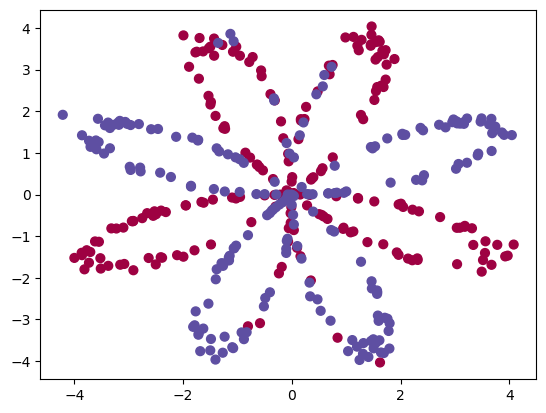

In [37]:
# visualizing the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

### Part 1 
- Detect the shape of variables X, Y and define the traning set size

In [38]:
# Shape of variables
shape_X = X.shape
shape_Y = Y.shape

# Training set size
m = X.shape[1]

### Part 2 - layer_sizes
Define 
 - n_x: the size of the input layer
 - n_h: the size of the hidden layer (**set manually**)
 - n_y: the size of the output layer

In [39]:
def layer_sizes(X, Y):

    n_x = len(X) 
    n_h = 4
    n_y = len(Y)

    return (n_x, n_h, n_y)

### Part 3 -  initialize_parameters

- Implement the function `initialize_parameters()`

In [40]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Part 4 - forward_propagation



In [41]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### Part 5 - compute_cost

- There are many ways to implement the cross-entropy loss. One way to implement one part of the equation without for loops has been used in this code.

In [42]:
def compute_cost(A2, Y):

    m = Y.shape[1] # number of examples

    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y), np.log(1-A2))
    cost = - np.sum(logprobs) / m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.

    return cost

### Part 6 -  backward_propagation
- Note: Backpropagation is usually the hardest (most mathematical) part in deep learning.

In [43]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### Part 7 - update_parameters

- Updating parameters (W1, b1, W2, b2) by using ***gradient descent***.

In [44]:
def update_parameters(parameters, grads, learning_rate = 1.3):
    
    # Retrieve a copy of each parameter from the dictionary "parameters"
    W1 = copy.deepcopy(parameters["W1"])
    b1 = copy.deepcopy(parameters["b1"])
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Calculate gradiants
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # Update new values of parameters 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Part 8 - nn_model

- Build the neural network model in `nn_model()` by intagrating functions.


In [45]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

## Test the Model
#### (Codes of this part taken from the course)

### Part 9 - predict

In [46]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.255816
Cost after iteration 2000: 0.237480
Cost after iteration 3000: 0.229239
Cost after iteration 4000: 0.224143
Cost after iteration 5000: 0.220636
Cost after iteration 6000: 0.222151
Cost after iteration 7000: 0.220677
Cost after iteration 8000: 0.219576
Cost after iteration 9000: 0.218699


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

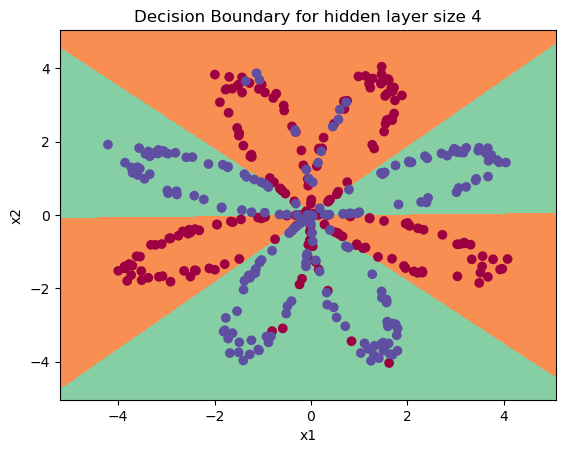

In [47]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [48]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 91%
